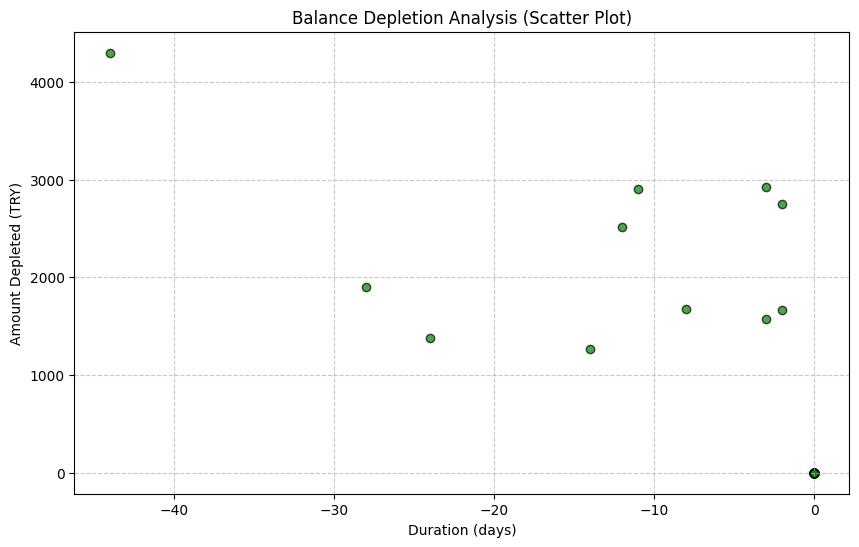

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Veriyi yükleme
data = pd.read_csv('/Users/emre/DSA PROJECT/Emre_YONTUCU_ticket.csv')

# Tarih sütununu datetime formatına çevirme
data['IslemZamanı'] = pd.to_datetime(data['IslemZamanı'], errors='coerce')
data['KartBakiyesi'] = data['KartBakiyesi'].str.replace(',', '.').astype(float)

# Bakiye değişimini tespit etme
data['balance_change'] = data['KartBakiyesi'].diff()
data['is_top_up'] = data['balance_change'] > 0  # Bakiye artışı varsa top-up olarak işaretle

# Top-up işlemleri ve tükenme süresi
top_up_indices = data.index[data['is_top_up']].tolist()
depletion_durations = []

for i in range(len(top_up_indices) - 1):
    start_index = top_up_indices[i]
    end_index = top_up_indices[i + 1]
    start_balance = data.loc[start_index, 'KartBakiyesi']
    end_balance = data.loc[end_index - 1, 'KartBakiyesi']  # Bir sonraki yüklemeden önceki bakiye
    duration = (data.loc[end_index - 1, 'IslemZamanı'] - data.loc[start_index, 'IslemZamanı']).days
    depletion_durations.append((start_balance - end_balance, duration))

# Tükenme analizi için DataFrame oluşturma
depletion_df = pd.DataFrame(depletion_durations, columns=['Amount Depleted', 'Duration (days)'])

# Scatter plot ile görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(depletion_df['Duration (days)'], depletion_df['Amount Depleted'], alpha=0.7, color='green', edgecolor='black')
plt.title('Balance Depletion Analysis (Scatter Plot)')
plt.xlabel('Duration (days)')
plt.ylabel('Amount Depleted (TRY)')
plt.grid(linestyle='--', alpha=0.7)
plt.show()
